In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uae-cancer-patient-dataset/_cancer_dataset_uae.csv


In [54]:
df = pd.read_csv('/kaggle/input/uae-cancer-patient-dataset/_cancer_dataset_uae.csv')

In [55]:
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [56]:
df.tail()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,NaN,NaN,Non-Smoker,NaN,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193
9999,PAT010000,31,Male,Expatriate,Dubai,2017-09-16,Liver,I,Radiation,2017-12-23,Zayed Military Hospital,Dr. SI45,Under Treatment,NaN,NaN,Smoker,Hypertension,East Asian,56,173


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [58]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities           4047
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [59]:
df.duplicated().sum()

0

In [60]:
df.shape


(10000, 20)

In [61]:
df.dtypes


Patient_ID              object
Age                      int64
Gender                  object
Nationality             object
Emirate                 object
Diagnosis_Date          object
Cancer_Type             object
Cancer_Stage            object
Treatment_Type          object
Treatment_Start_Date    object
Hospital                object
Primary_Physician       object
Outcome                 object
Death_Date              object
Cause_of_Death          object
Smoking_Status          object
Comorbidities           object
Ethnicity               object
Weight                   int64
Height                   int64
dtype: object

In [62]:
df.isnull().sum().sum()

22063

In [63]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Nationality', 'Emirate',
       'Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type',
       'Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Outcome',
       'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities',
       'Ethnicity', 'Weight', 'Height'],
      dtype='object')

In [64]:
from datetime import datetime

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"]=(10,6)

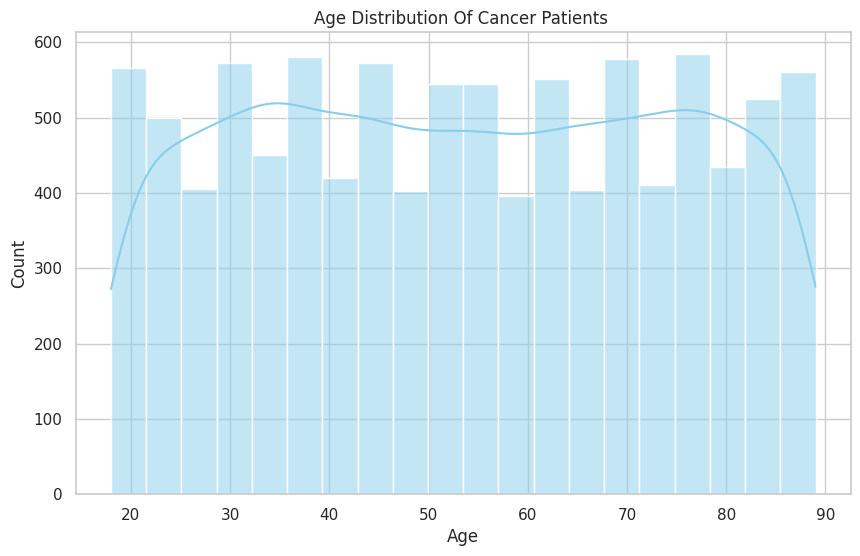

In [67]:
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title("Age Distribution Of Cancer Patients ")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

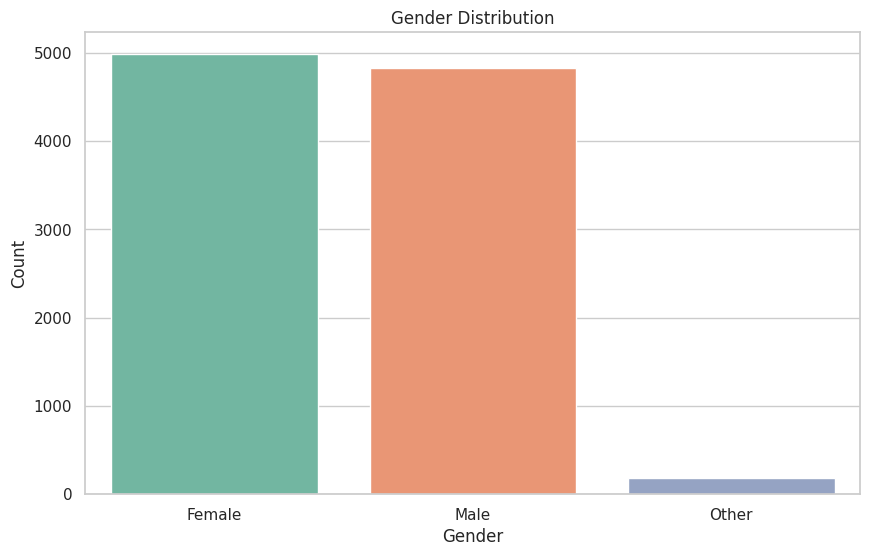

In [68]:
sns.countplot(data=df,x='Gender',palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

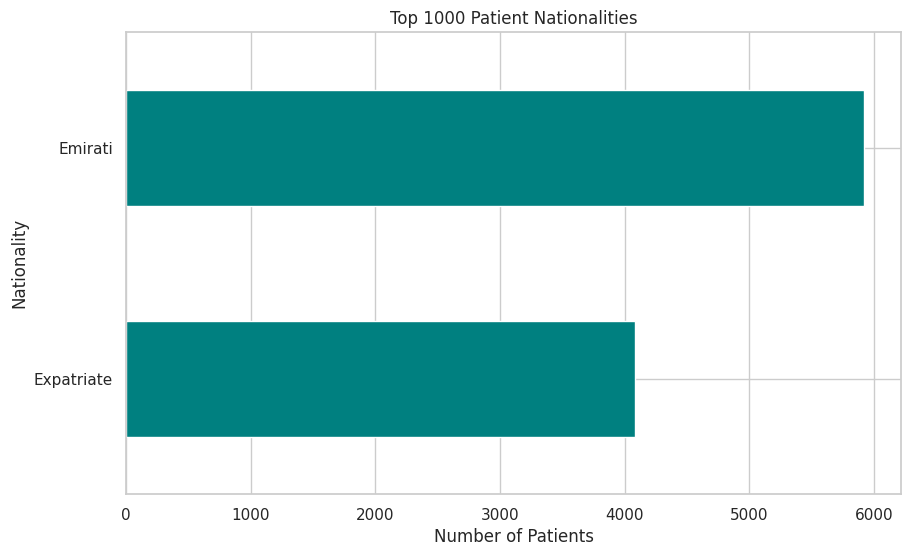

In [69]:
top_nationalities = df['Nationality'].value_counts().nlargest(1000)
top_nationalities.plot(kind='barh',color='Teal')
plt.title("Top 1000 Patient Nationalities")
plt.xlabel("Number of Patients")
plt.ylabel("Nationality")
plt.gca().invert_yaxis()
plt.show()

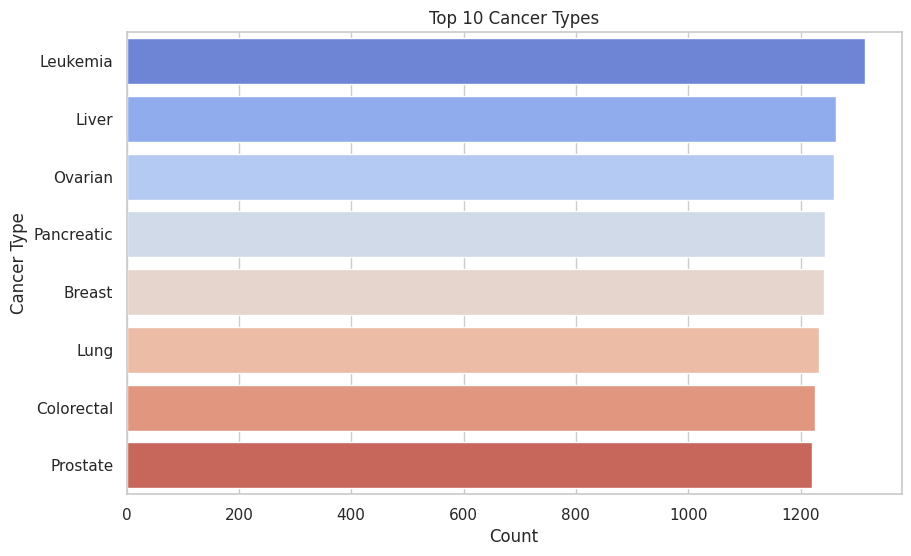

In [70]:
top_cancers=df['Cancer_Type'].value_counts().nlargest(10)
sns.barplot(x=top_cancers.values,y=top_cancers.index,palette="coolwarm")
plt.title("Top 10 Cancer Types")
plt.xlabel("Count")
plt.ylabel("Cancer Type")
plt.show()

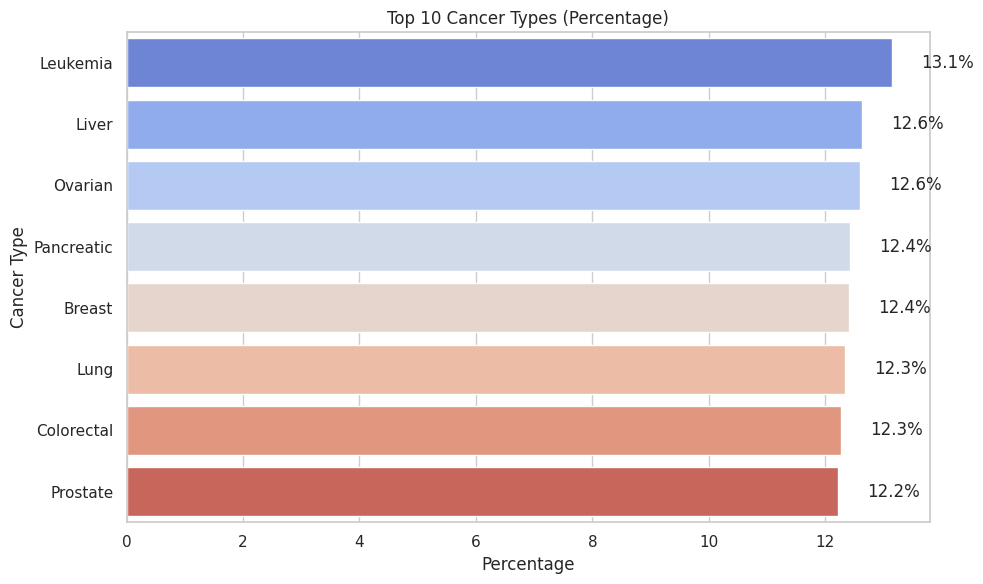

In [71]:
top_cancers = df['Cancer_Type'].value_counts(normalize=True).nlargest(10) * 100
sns.barplot(x=top_cancers.values, y=top_cancers.index, palette="coolwarm")
for i, v in enumerate(top_cancers.values):
    plt.text(v + 0.5, i, f"{v:.1f}%",va='center')

plt.title("Top 10 Cancer Types (Percentage)")
plt.xlabel("Percentage")
plt.ylabel("Cancer Type")
plt.tight_layout()
plt.show()

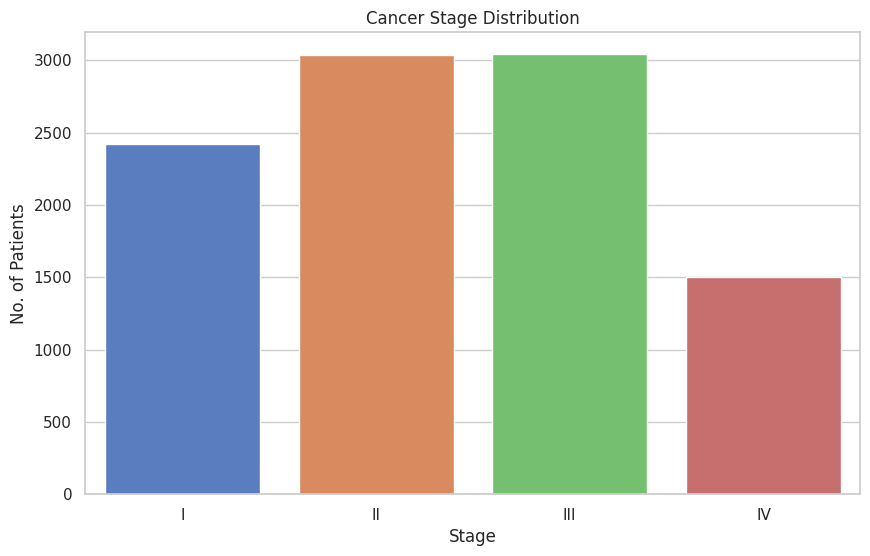

In [72]:
sns.countplot(data=df,x='Cancer_Stage',order=sorted(df['Cancer_Stage'].dropna().unique()),palette="muted")
plt.title("Cancer Stage Distribution")
plt.xlabel("Stage")
plt.ylabel("No. of Patients")
plt.show()

In [73]:
import pandas as pd

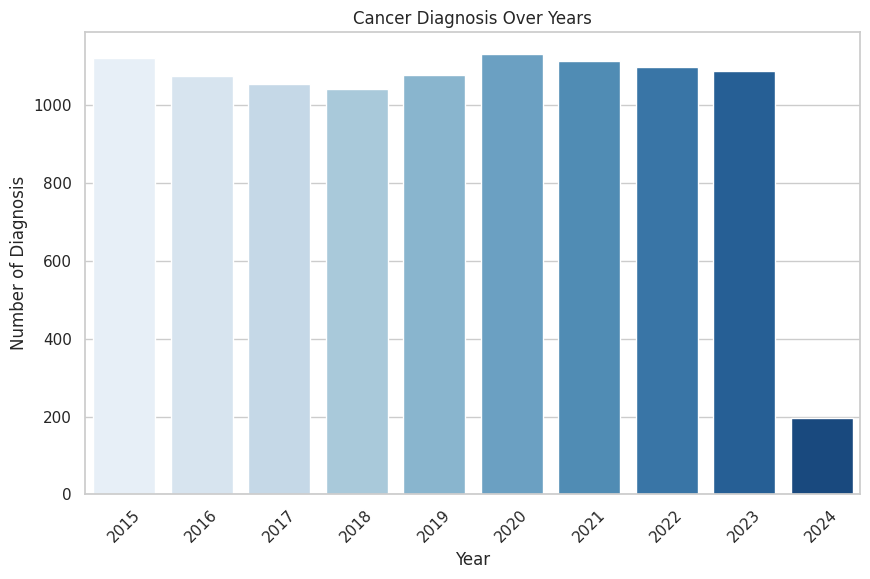

In [74]:
df['Diagnosis_Date']=pd.to_datetime(df['Diagnosis_Date'],errors='coerce')
df['Diagnosis_Year']=df['Diagnosis_Date'].dt.year

sns.countplot(data=df,x='Diagnosis_Year',palette='Blues')
plt.title("Cancer Diagnosis Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Diagnosis")
plt.xticks(rotation=45)
plt.show()

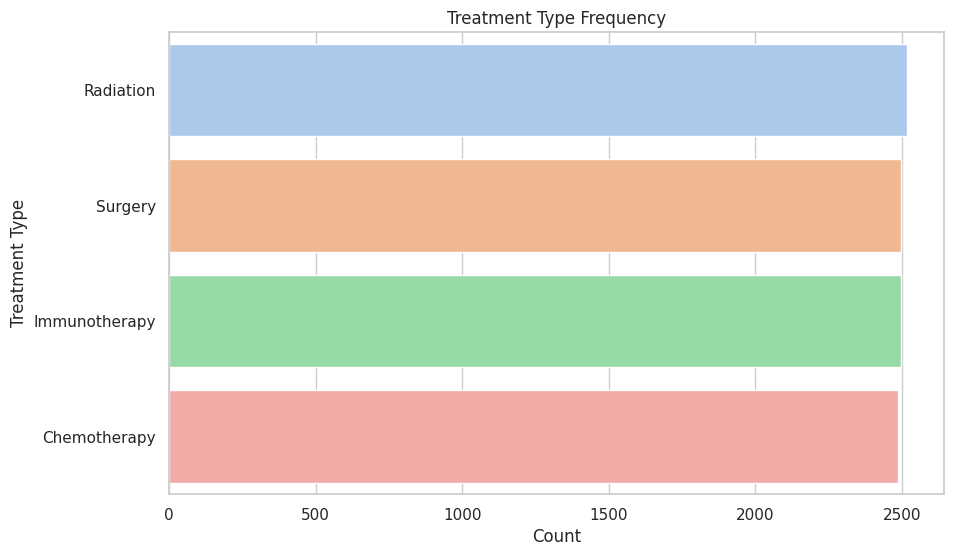

In [75]:
sns.countplot(data=df,y='Treatment_Type',order=df['Treatment_Type'].value_counts().index,palette='pastel')
plt.title("Treatment Type Frequency")
plt.ylabel("Treatment Type")
plt.xlabel("Count")
plt.show()



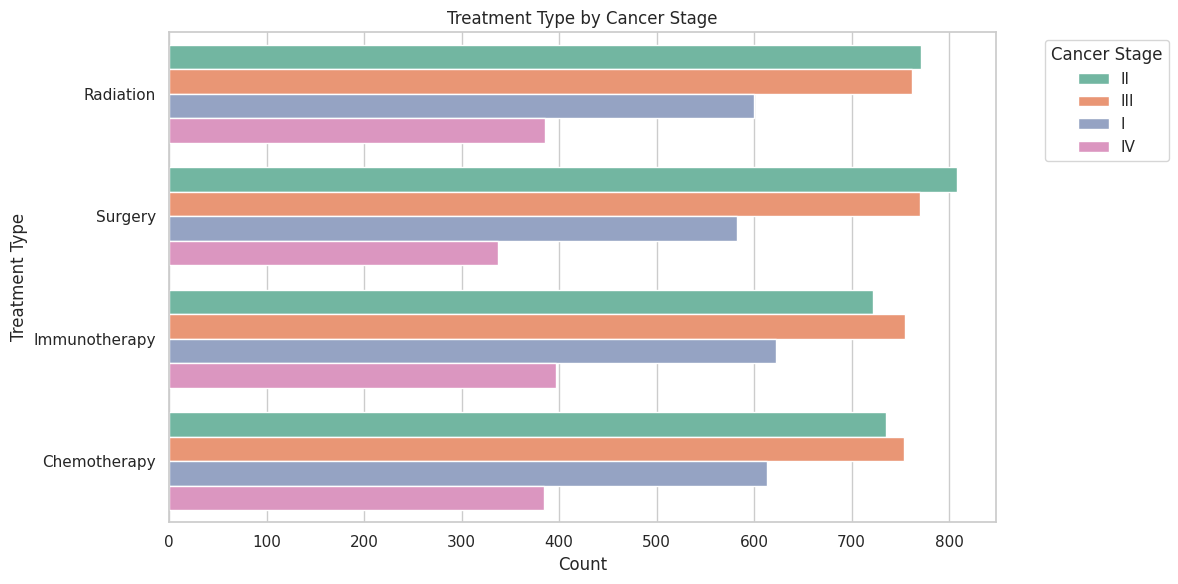

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    y='Treatment_Type',
    hue='Cancer_Stage',  # Adds colored bars by stage
    order=df['Treatment_Type'].value_counts().index,
    palette='Set2'
)

plt.title("Treatment Type by Cancer Stage")
plt.xlabel("Count")
plt.ylabel("Treatment Type")
plt.legend(title="Cancer Stage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

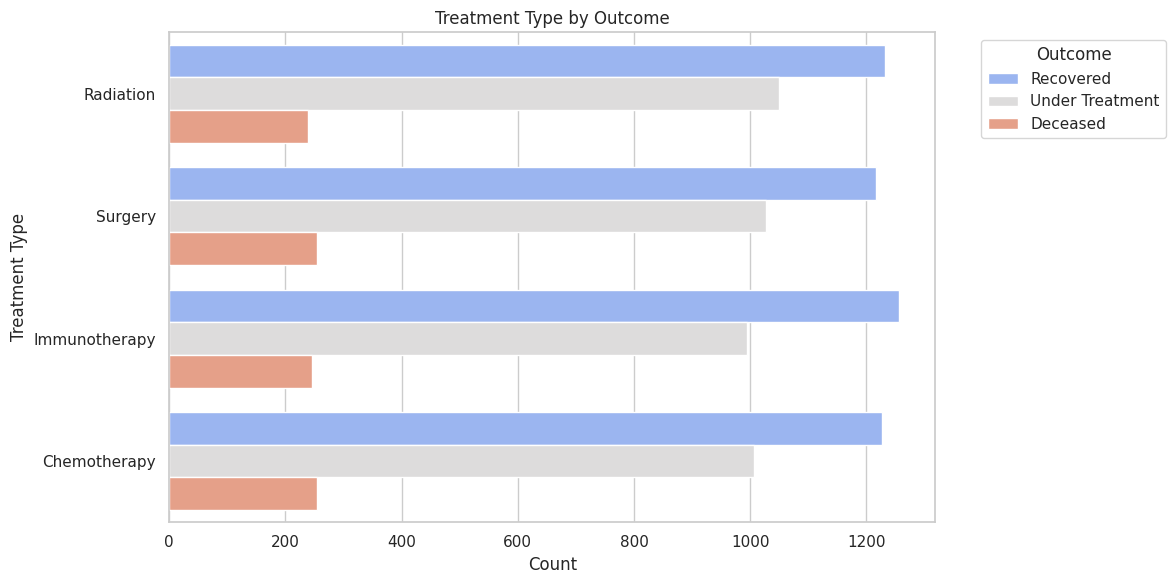

In [77]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    y='Treatment_Type',
    hue='Outcome',  # Group by treatment outcome
    order=df['Treatment_Type'].value_counts().index,
    palette='coolwarm'
)

plt.title("Treatment Type by Outcome")
plt.xlabel("Count")
plt.ylabel("Treatment Type")
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

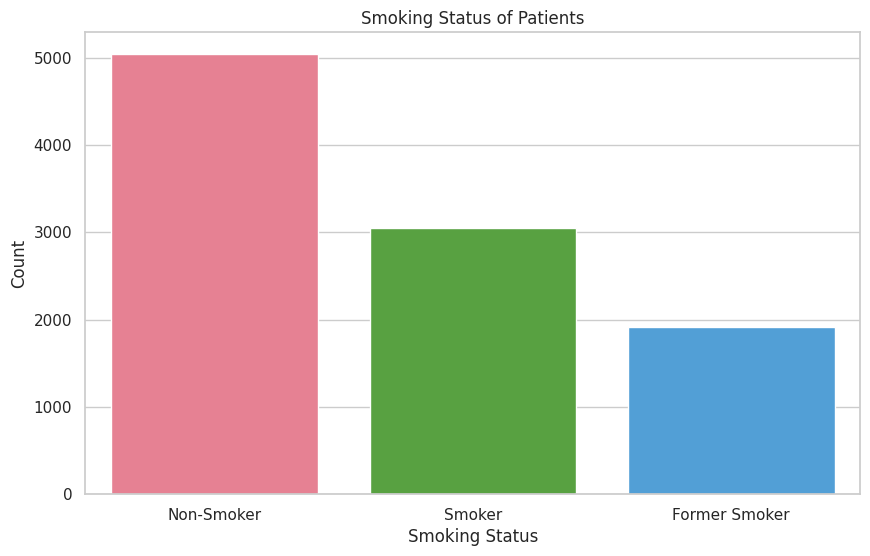

In [78]:
sns.countplot(data=df, x='Smoking_Status', palette='husl')
plt.title("Smoking Status of Patients")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.show()

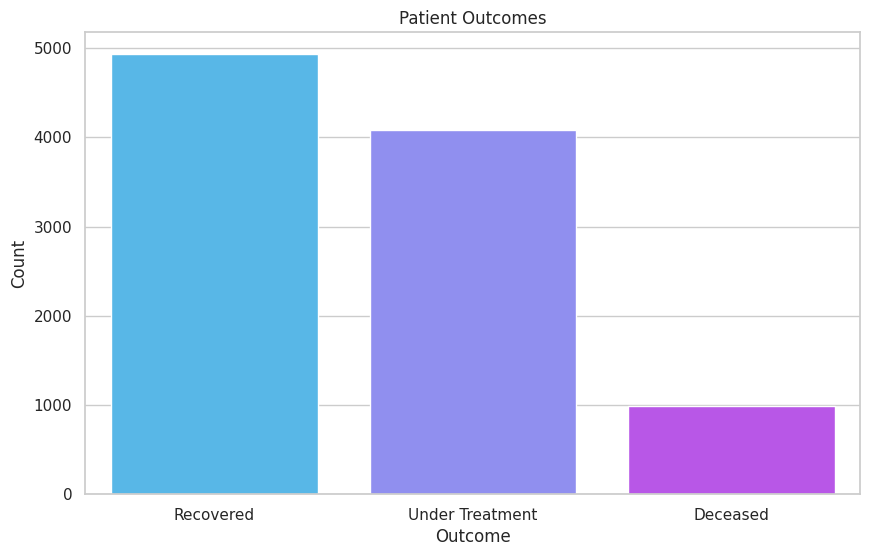

In [79]:
sns.countplot(data=df, x='Outcome', palette='cool')
plt.title("Patient Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

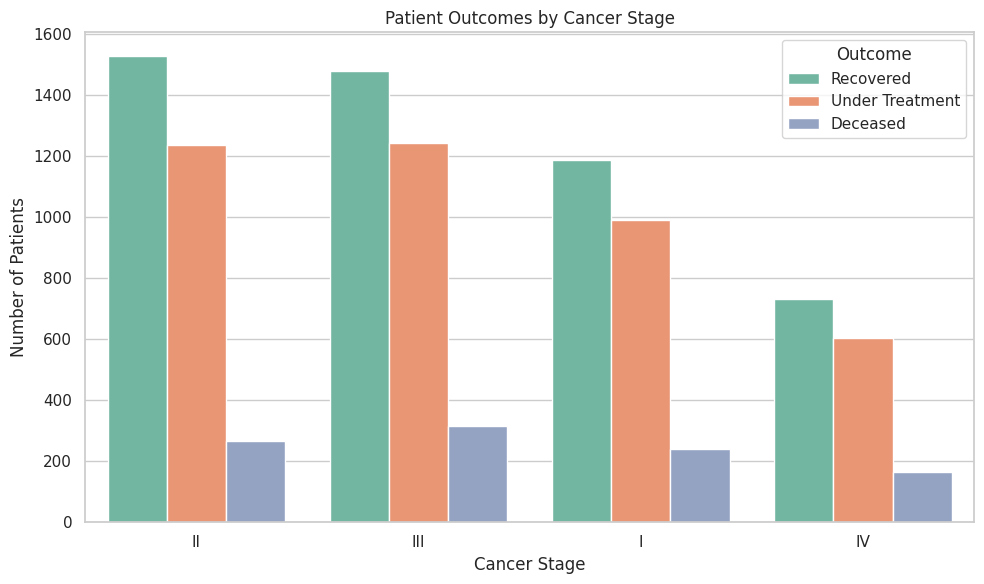

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Cancer_Stage',
    hue='Outcome',  # Show outcomes within each stage
    palette='Set2'
)

plt.title("Patient Outcomes by Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Number of Patients")
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

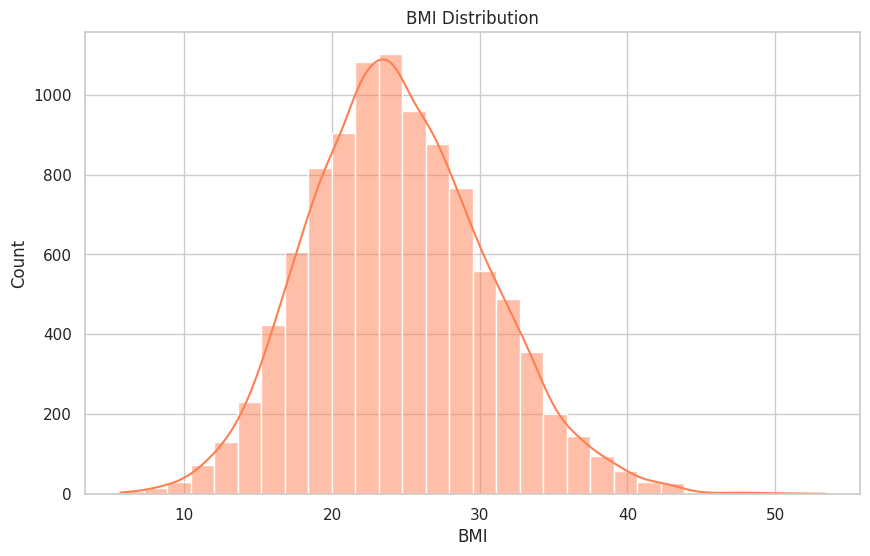

In [81]:

df['BMI']=df['Weight']/(df['Height']/100)**2
sns.histplot(df['BMI'],kde=True,bins=30,color='coral')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

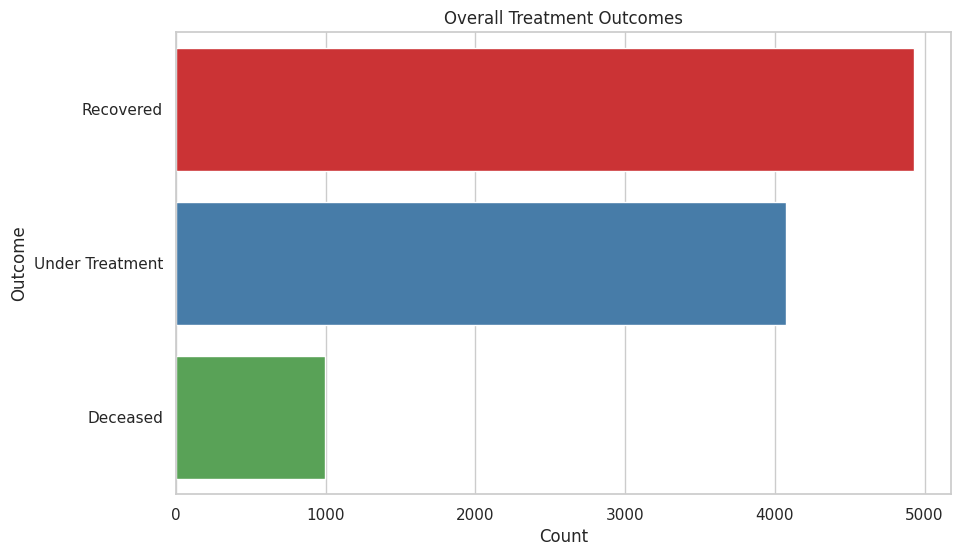

In [82]:
sns.countplot(data=df,y='Outcome',order=df['Outcome'].value_counts().index,palette='Set1')
plt.title("Overall Treatment Outcomes")
plt.xlabel("Count")
plt.ylabel("Outcome")
plt.show()

In [83]:
df['Survived']=df['Outcome'].apply(lambda x:0 if x=='Deceased' else 1)

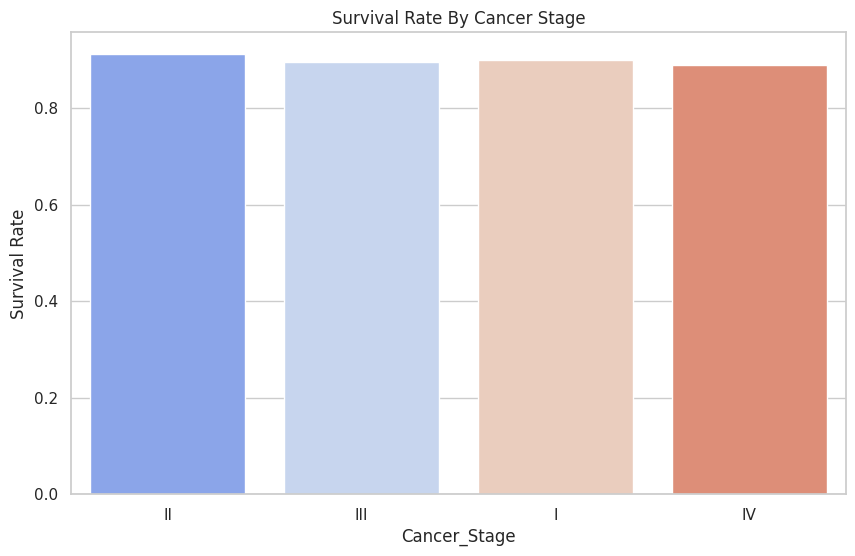

In [84]:
sns.barplot(data=df,x='Cancer_Stage',y='Survived',ci=None,palette='coolwarm')
plt.title("Survival Rate By Cancer Stage")
plt.ylabel("Survival Rate")
plt.show()

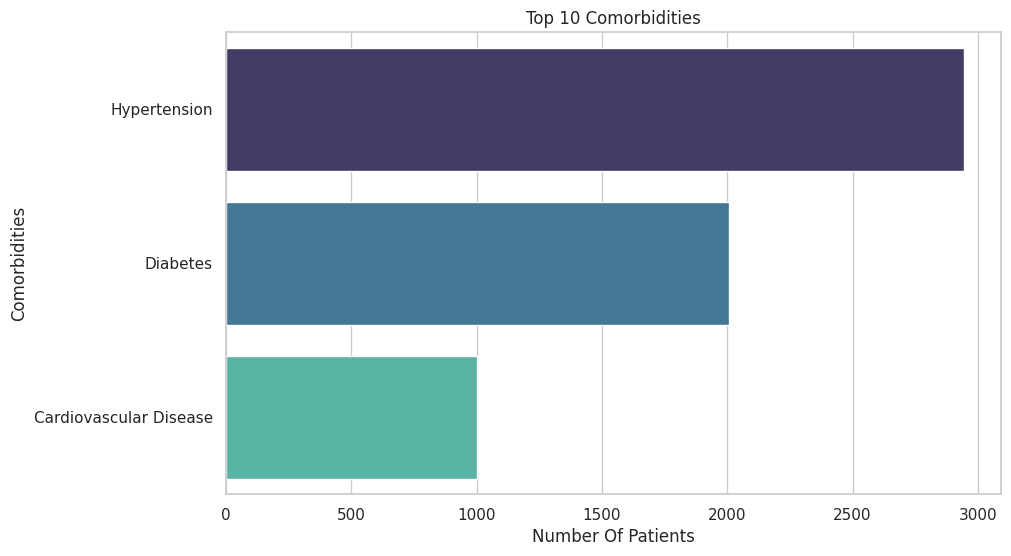

In [85]:
comorbidity_counts = df['Comorbidities'].value_counts().nlargest(10)
sns.barplot(x=comorbidity_counts.values,y=comorbidity_counts.index,palette='mako')
plt.title("Top 10 Comorbidities")
plt.xlabel("Number Of Patients")
plt.ylabel("Comorbidities")
plt.show()

**Predictive modeling**

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [87]:
pip install imbalanced-learn

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [93]:
df_model = df[['Age', 'Weight', 'Height', 'Cancer_Stage', 'Treatment_Type', 'Cancer_Type', 'Outcome']].dropna()


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_model['Outcome_Encoded'] = le.fit_transform(df_model['Outcome'])

# One-hot encode categorical features
df_model = pd.get_dummies(df_model, columns=['Cancer_Stage', 'Treatment_Type', 'Cancer_Type'], drop_first=True)


In [97]:
# Display unique outcome values
print('Unique Outcome values:', df_model['Outcome'].unique())

Unique Outcome values: ['Recovered' 'Under Treatment' 'Deceased']


In [98]:
le = LabelEncoder()
df_model['Outcome_Encoded'] = le.fit_transform(df_model['Outcome'])

In [99]:
# Define features and target
X = df_model[['Age', 'Weight', 'Height']]
y = df_model['Outcome_Encoded']

In [100]:
# Check class distribution
print("Class distribution in Outcome:")
print(df['Outcome'].value_counts())

# Only continue if at least two classes exist
if df['Outcome'].nunique() < 2:
    raise ValueError("Not enough class labels in Outcome to perform classification.")

# Use stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Class distribution in Outcome:
Outcome
Recovered          4931
Under Treatment    4077
Deceased            992
Name: count, dtype: int64


In [101]:
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False

In [102]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}
if xgb_available:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

Model Accuracy Scores:
Logistic Regression: 49.30%
Random Forest: 43.85%
Decision Tree: 43.75%
KNN: 43.35%
SVM: 49.30%
XGBoost: 46.10%


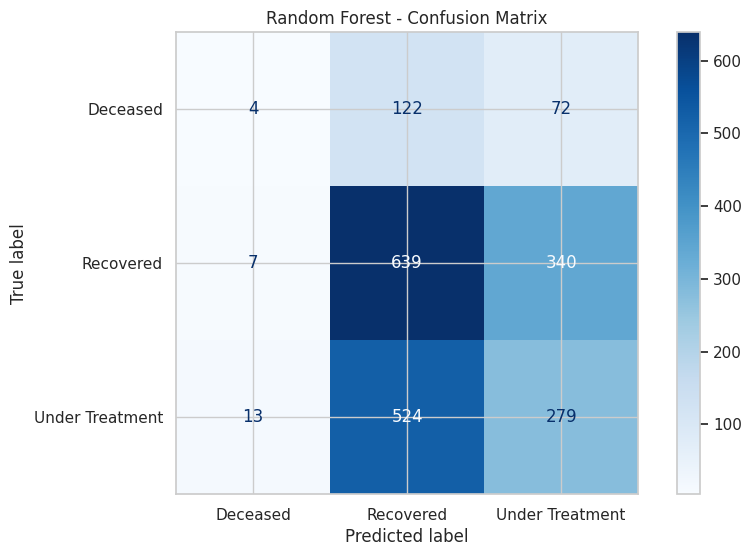

In [103]:
# Train and evaluate
print("Model Accuracy Scores:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name}: {acc:.2f}%")
    
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

Summary & Key Insights¶


* The most common cancer types include Liver, Lung, and Leukemia.
* Most patients are diagnosed at Stage II or III, emphasizing the need for earlier detection.
* Treatment types like Radiation and Surgery are most common, with Chemotherapy used extensively in Lung and Pancreatic cancers.
* Smoking shows a notable correlation with Lung cancer and worse outcomes.
* Patients with comorbidities such as Hypertension and Cardiovascular Disease tend to have lower survival rates.
* BMI and Age show variability across different cancer types, potentially influencing outcomes.
* There are data anomalies (e.g., male patients with ovarian cancer) that suggest a need for further data validation.
* This dataset offers critical insights into cancer patterns in the UAE and opens up further opportunities for predictive modeling and public health planning.# 
